In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Coldplay.csv')

# Data Information

- **Popularity**: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. It is calculated by algorithm and is based, in the most part, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

- Acacousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

- Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typically range between -60 and 0 db.

- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech. Values below 0.33 most likely represent music and other non-speech-like tracks.

- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- Time Signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

# Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              232 non-null    object 
 1   duration          232 non-null    float64
 2   release_date      232 non-null    object 
 3   album_name        232 non-null    object 
 4   explicit          232 non-null    bool   
 5   popularity        232 non-null    int64  
 6   acousticness      232 non-null    float64
 7   danceability      232 non-null    float64
 8   energy            232 non-null    float64
 9   instrumentalness  232 non-null    float64
 10  liveness          232 non-null    float64
 11  loudness          232 non-null    float64
 12  speechiness       232 non-null    float64
 13  tempo             232 non-null    float64
 14  time_signature    232 non-null    int64  
 15  valence           232 non-null    float64
dtypes: bool(1), float64(10), int64(2), object(3)

In [4]:
df.isna().sum()

name                0
duration            0
release_date        0
album_name          0
explicit            0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
df.describe()

,duration,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,262.262586,43.362069,0.242882,0.388537,0.622547,0.206304,0.402314,-8.716358,0.046014,122.630185,3.849138,0.233402
std,90.885502,21.115800,0.326769,0.143816,0.225704,0.319071,0.326351,3.782933,0.029751,27.007414,0.463937,0.144770
min,21.388000,0.000000,0.000089,0.071400,0.049100,0.000000,0.035900,-29.286000,0.024300,64.501000,1.000000,0.018500
25%,225.183000,23.000000,0.006667,0.280750,0.455500,0.000594,0.123000,-9.362250,0.031900,102.839000,4.000000,0.130750
50%,261.773000,44.000000,0.046850,0.405500,0.670500,0.016700,0.288500,-7.520000,0.036800,126.618000,4.000000,0.209000
75%,303.259500,59.000000,0.433250,0.491000,0.805250,0.345250,0.725250,-6.526000,0.048100,138.015000,4.000000,0.303000
max,617.057000,91.000000,0.990000,0.806000,0.971000,0.993000,0.994000,-3.516000,0.248000,204.520000,5.000000,0.802000


# Data Visualization

In [6]:
top_10 = df[['name', 'album_name', 'popularity']].sort_values('popularity', ascending=False).head(10)

Text(0.5, 0, 'Popularity')

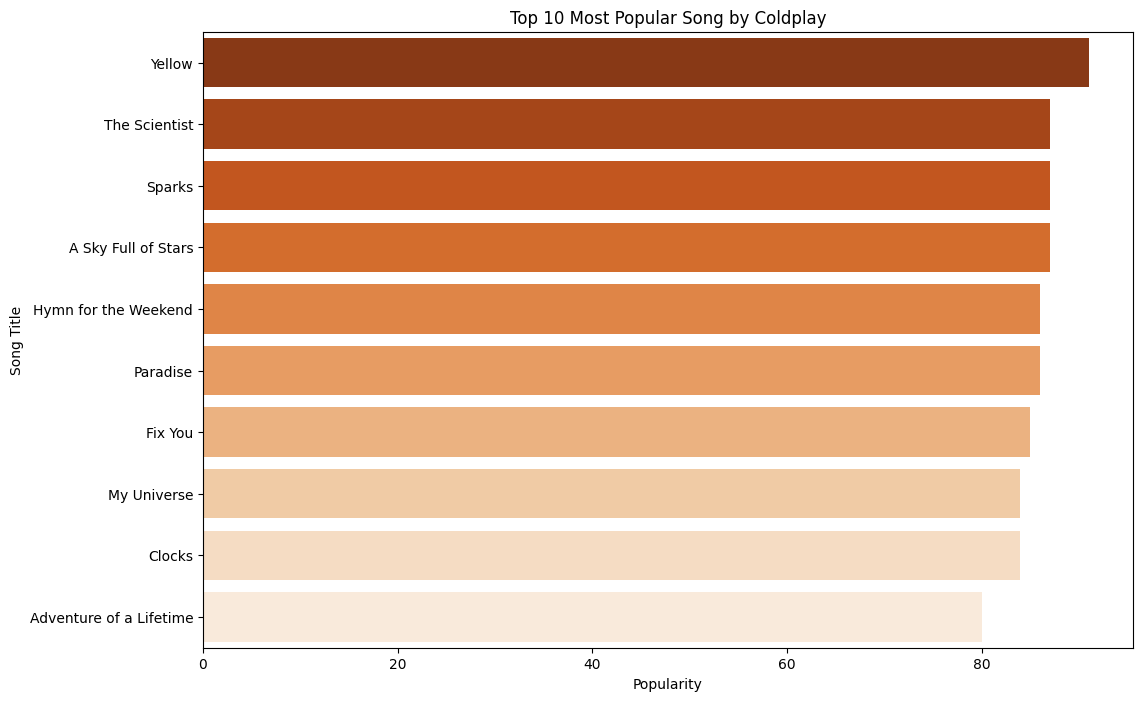

In [23]:
plt.figure(figsize=(12,8))
plt.title('Top 10 Most Popular Song by Coldplay')
sns.barplot(data=top_10, x="popularity", y="name", palette = 'Oranges_r')
plt.ylabel('Song Title')
plt.xlabel('Popularity')

In [8]:
top_10_album = df.groupby(['album_name'], as_index=False)[['popularity']].mean().round(2).sort_values('popularity', ascending=False).head(10)

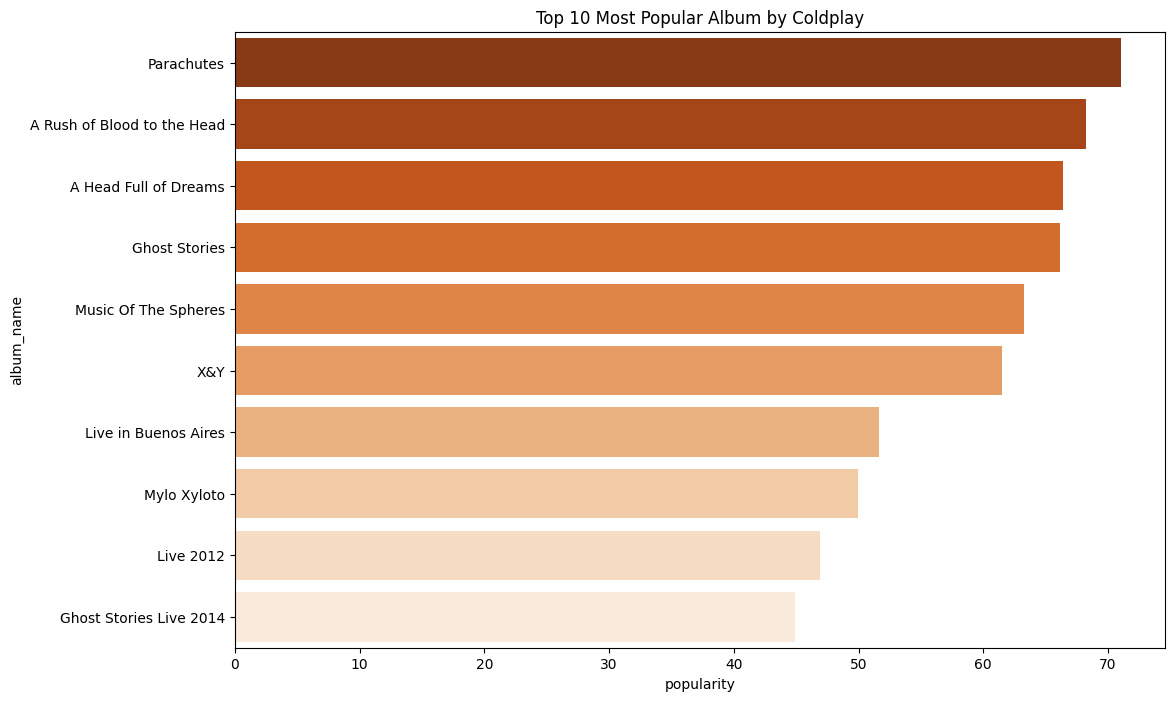

In [9]:
plt.figure(figsize=(12,8))
plt.title('Top 10 Most Popular Album by Coldplay')
sns.barplot(data=top_10_album, x="popularity", y="album_name", palette='Oranges_r');

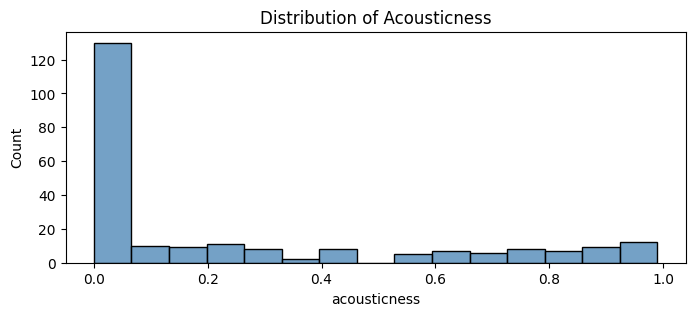

In [10]:
n_bins = int(np.sqrt(len(df['acousticness'])))

plt.figure(figsize=(8,3))
plt.title('Distribution of Acousticness')
sns.histplot(df, x="acousticness", color='steelblue', bins = n_bins);

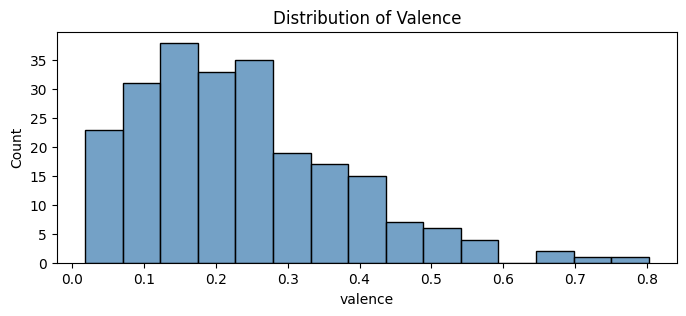

In [11]:
n_bins = int(np.sqrt(len(df['valence'])))

plt.figure(figsize=(8,3))
plt.title('Distribution of Valence')
sns.histplot(df, x="valence", color='steelblue', bins = n_bins);

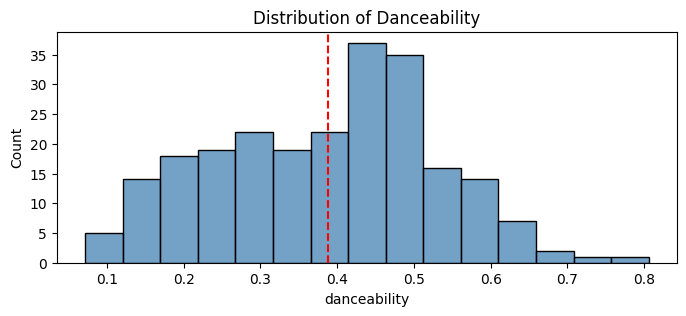

In [13]:
n_bins = int(np.sqrt(len(df['danceability'])))
line_value = df['danceability'].mean()

plt.figure(figsize=(8,3))
plt.title('Distribution of Danceability')
sns.histplot(df, x="danceability", color='steelblue', bins = n_bins)
plt.axvline(line_value, color = 'red', linestyle='--');

In [16]:
top10_acc = df[['name', 'valence', 'popularity']].sort_values('popularity', ascending=False).head(10)

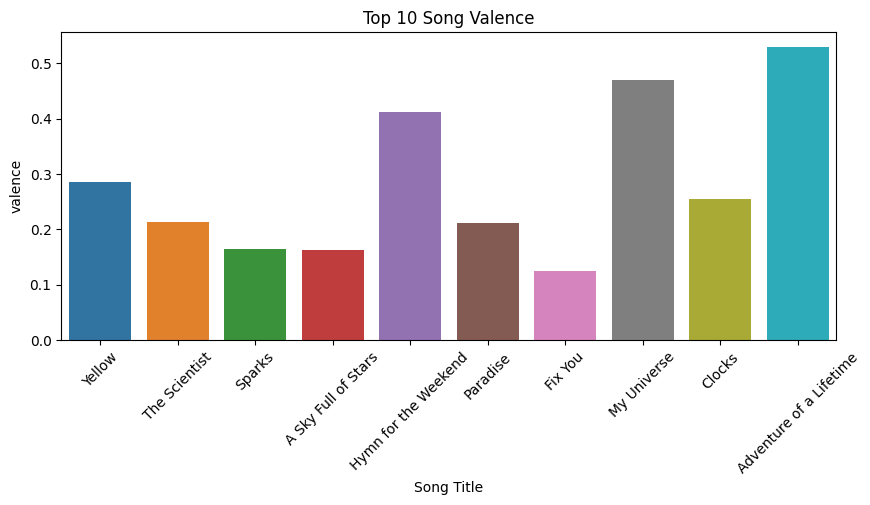

In [24]:
plt.figure(figsize=(10,4))
sns.barplot(data=top10_acc, x="name", y="valence");
plt.xticks(rotation=45)
plt.xlabel('Song Title')
plt.title('Top 10 Song Valence')


plt.show()

In [19]:
top10_dance = df[['name', 'danceability', 'popularity']].sort_values('popularity', ascending=False).head(10)

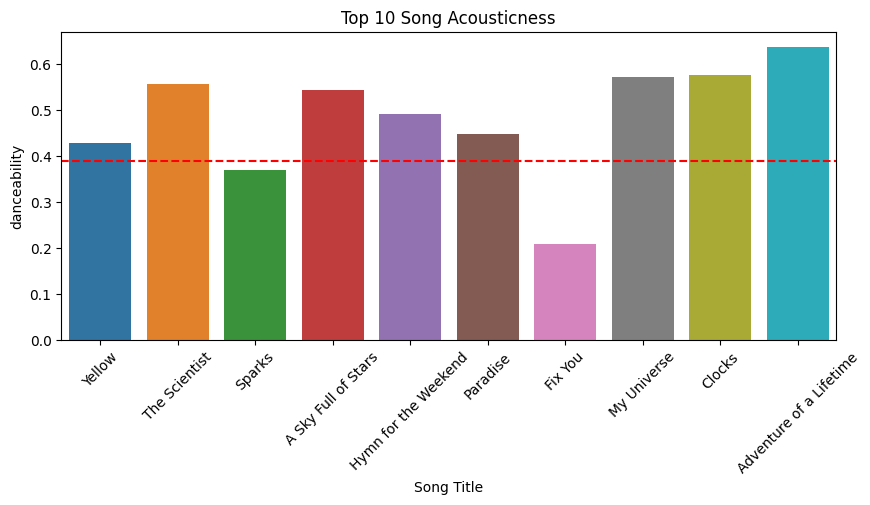

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(data=top10_dance, x="name", y="danceability");
plt.xticks(rotation=45)
plt.xlabel('Song Title')
plt.title('Top 10 Song Acousticness')

# Calculate the mean value
mean_value = df['danceability'].mean()

# Draw a line at the mean value
plt.axhline(mean_value, color='red', linestyle='--')

plt.show()